In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

In [4]:
df = pd.read_csv('/Users/sandramikolajek/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
newdf = df[(df.Department == 'Sales') & (df.JobRole == 'Manager')].groupby(['Department', 'JobRole', 'JobLevel', 'Education'])['EmployeeNumber'].count().reset_index()
newdf

,Department,JobRole,JobLevel,Education,EmployeeNumber
0,Sales,Manager,3,1,1
1,Sales,Manager,3,2,1
2,Sales,Manager,3,3,2
3,Sales,Manager,4,1,1
4,Sales,Manager,4,2,3
5,Sales,Manager,4,3,8
6,Sales,Manager,4,4,6
7,Sales,Manager,4,5,2
8,Sales,Manager,5,1,1
9,Sales,Manager,5,2,2


<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)>

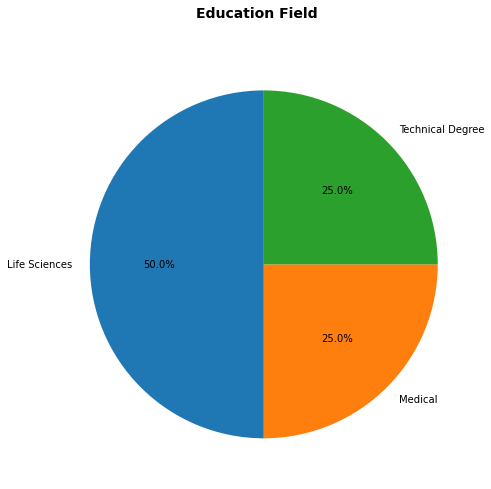

In [6]:
#do zmiany ręcznej - Education Field

newdf = df[(df.Department == 'Sales') & (df.JobRole == 'Manager') & (df.JobLevel == 3)].groupby(['Department', 'JobRole', 'JobLevel', 'EducationField'])['EmployeeNumber'].count().reset_index()
plt.figure(figsize=(8,8))
plt.pie(newdf.EmployeeNumber, labels=newdf.EducationField, autopct='%1.1f%%', startangle=90, normalize=True)
plt.suptitle('Education Field', y=0.95, fontsize=14, fontweight='semibold');
plt.pie


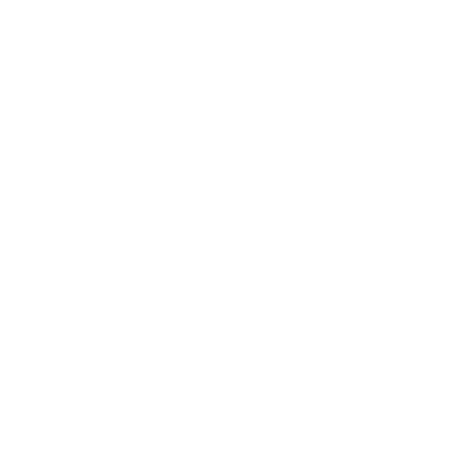

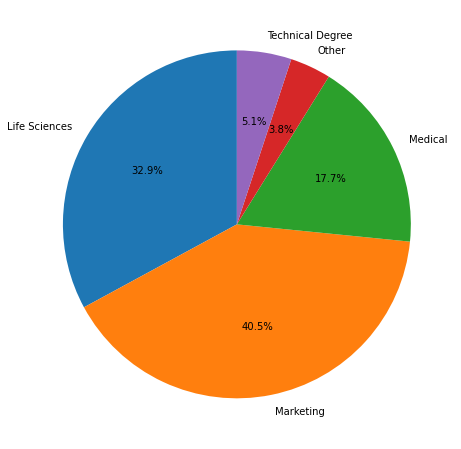

In [7]:
# do filtrowania dropdownami - Education Field

output = widgets.Output()
dropdown_dpt = widgets.Dropdown(options = df.Department.unique(), description = 'Department: ')
dropdown_jr = widgets.Dropdown(options = df.JobRole.unique(), description = 'Job Role: ')
dropdown_jl = widgets.Dropdown(options = df.JobLevel.unique(), description = 'Job Level: ')

def filter(dpt, jr):
    newdf = df[(df.Department == dropdown_dpt.value) & (df.JobRole == dropdown_jr.value) & (df.JobLevel == dropdown_jl.value)].groupby(['Department', 'JobRole', 'JobLevel', 'EducationField'])['EmployeeNumber'].count().reset_index()
    plt.figure(figsize=(8,8))
    plt.pie(newdf.EmployeeNumber, labels=newdf.EducationField, autopct='%1.1f%%', startangle=90, normalize=True)
    with output:
        display(plt.pie)

def dropdown_dpt_eventhandler(change):
    filter(change.new, dropdown_dpt.value)
def dropdown_jr_eventhandler(change):
    filter(change.new, dropdown_jr.value)
def dropdown_jl_eventhandler(change):
    filter(change.new, dropdown_jl.value)

    
dropdown_dpt.observe(dropdown_dpt_eventhandler, names='value')
dropdown_jr.observe(dropdown_jr_eventhandler, names='value')
dropdown_jl.observe(dropdown_jl_eventhandler, names='value')

input_widgets = widgets.HBox([dropdown_dpt, dropdown_jr, dropdown_jl])
display(input_widgets)

